## Implementation of Kaczmarz algorithm for updating the weights in a Polynomial linear regrsssion

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared

# Kaczmarz Algorithm

The Kaczmarz algorithm, also known as the Algebraic Reconstruction Technique (ART), is an iterative method used to solve systems of linear equations.

The general form of the Kaczmarz algorithm is:

$$
x^{(k+1)} = x^{(k)} + \frac{b_i - a_i^T x^{(k)}}{||a_i||^2} a_i
$$

where:

- $x^{(k)}$ is the solution vector at the $k_{th}$ iteration,
- $b_i$ is the $i_{th}$ element of the vector $b$ (from the system $Ax = b$),
- $a_i$ is the $i_{th}$ row of the matrix $A$ (from the system $Ax = b$),
- $a_i^T$ is the transpose of $a_i$,
- $||a_i||^2$ is the Euclidean norm (squared) of $a_i$,
- $k$ is the current iteration number.

The algorithm works by iteratively projecting the current solution estimate onto the hyperplanes defined by each equation in the system. This process is repeated until the solution converges to a satisfactory level of accuracy.

Please note that this is a simplified explanation and the actual implementation of the Kaczmarz algorithm can involve additional steps and considerations, such as row normalization and relaxation parameters.


In [3]:
## Function to generate polynomial features using monomial base functions
## This function can be also defined using a for loop and plain NumPy

def generate_design_matrix_from_1D_data(x_initial,polynomial_order):
    """
    Input: 
    x_initial: shape=(N,) where 'N' is the number of samples
    polynomial_order: scalar: the order of polynomial you want to fit to the data
    
    ouput: design_matrix: shape=(N,polynomial_order+1)
    """
    # Check if x_initial is a scalar
    if np.isscalar(x_initial):
        # If it is, convert it to a numpy array
        x_initial = np.array([x_initial])
    elif isinstance(x_initial, list):
        # If it is a list, convert it to a numpy array
        x_initial = np.array(x_initial)

        
    
    # Generate the polynomial features using sklearn_preprocessing package
    poly_features=PolynomialFeatures(degree=polynomial_order)

    # Update the design matrix using the polynomial features created in the previous step
    design_matrix=poly_features.fit_transform(x_initial.reshape(-1,1))

    return design_matrix

In [4]:
np.random.seed(14)
X_initial_matrix = np.random.random((10,1))
print('X_initial_matrix: ', X_initial_matrix.shape)

X_initial_matrix = X_initial_matrix[:,0]
print('X_initial_matrix: ', X_initial_matrix)
print(X_initial_matrix.shape)
desgin_matrix = generate_design_matrix_from_1D_data(X_initial_matrix,2)
print('desgin_matrix : ', desgin_matrix )

X_initial_matrix:  (10, 1)
X_initial_matrix:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593 0.95760374
 0.51311671 0.31828442 0.53919994 0.22125494]
(10,)
desgin_matrix :  [[1.00000000e+00 5.13943344e-01 2.64137761e-01]
 [1.00000000e+00 7.73165052e-01 5.97784198e-01]
 [1.00000000e+00 8.70427686e-01 7.57644356e-01]
 [1.00000000e+00 8.04694853e-03 6.47533806e-05]
 [1.00000000e+00 3.09735926e-01 9.59363435e-02]
 [1.00000000e+00 9.57603739e-01 9.17004922e-01]
 [1.00000000e+00 5.13116712e-01 2.63288760e-01]
 [1.00000000e+00 3.18284425e-01 1.01304975e-01]
 [1.00000000e+00 5.39199937e-01 2.90736573e-01]
 [1.00000000e+00 2.21254942e-01 4.89537495e-02]]


In [5]:
def online_kaczmarz(design_matrix,target_values,iterations,r, weights=None):

    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix[-r:,:]
    print('x: ', x.shape)
    y = target_values[-r:]
    print('y: ', y.shape)



    for k in range(iterations):

        for i in range(r):

            a = x[i,:]
    
            print('a: ', a.shape)
            print('weight_predictions: ', weight_predictions.shape)
            print('target_values: ', target_values.shape)
            print('np.linalg.norm(a)**2: ', np.linalg.norm(a)**2)
            
            weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

            print('a.T: ', a.T.shape)
            print('np.dot(a, weight_predictions): ', np.dot(a, weight_predictions).shape)
            print('weight_predictions: ', weight_predictions.shape)


    # This is for beta

    # residual_errors = target_values - design_matrix @ weight_predictions
    # sse = residual_errors.T @ residual_errors
    # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [6]:
def online_kaczmarz_single_input(design_matrix, target_values, polynomial_degree, weights=None):

    design_matrix = generate_design_matrix_from_1D_data(design_matrix, polynomial_degree)
    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    # print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    # print('y: ', y.shape)

    
    
    
    
    
    for i in range (design_matrix.shape[0]):
        a = x[-1,:]
        # print('a: ', a.shape)
        
        
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [7]:
def online_kaczmarz_single_input_steps(design_matrix,target_values, weights=None):

    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.ones(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    print('y: ', y.shape)

    print('weight_predictions: ', weight_predictions.shape)
    
    print('np.linalg.norm(x)**2: ', np.linalg.norm(x)**2)
    
    
    
    
    
    for i in range (design_matrix.shape[0]):
        a = x[i,:]
        print('a: ', a.shape)
        
        step_1 = np.dot(a, weight_predictions)
        print('step_1: ', step_1)
        print('step_1: ', step_1.shape)

        step_2 = y - step_1
        print('step_2: ', step_2.shape)
        
        step_3 = step_2 / np.linalg.norm(a)**2
        print('step_3: ', step_3.shape)
        
        step_4 = step_3 + a.T
        print('step_4: ', step_4.shape)
        
        weight_predictions = weight_predictions + step_4
        print('weight_predictions: ', weight_predictions.shape)

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

x :  (500, 1)
y :  (500, 1)
coefficients shape:  (4, 500)
real_coeffs:  [[  1 -10   7  -6  -3]]
coefficients:  [ 1.02 -9.99  7.02 -6.08]


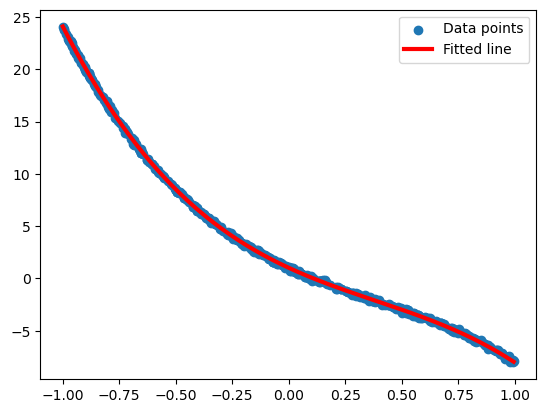

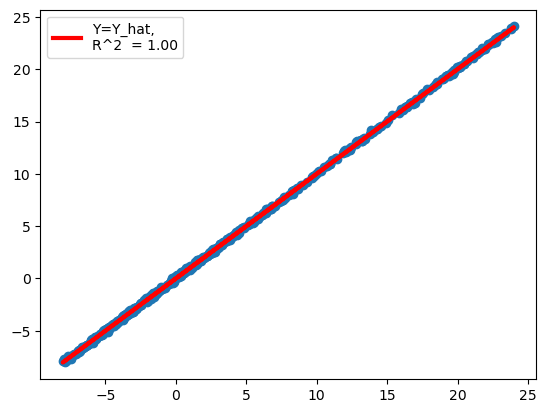

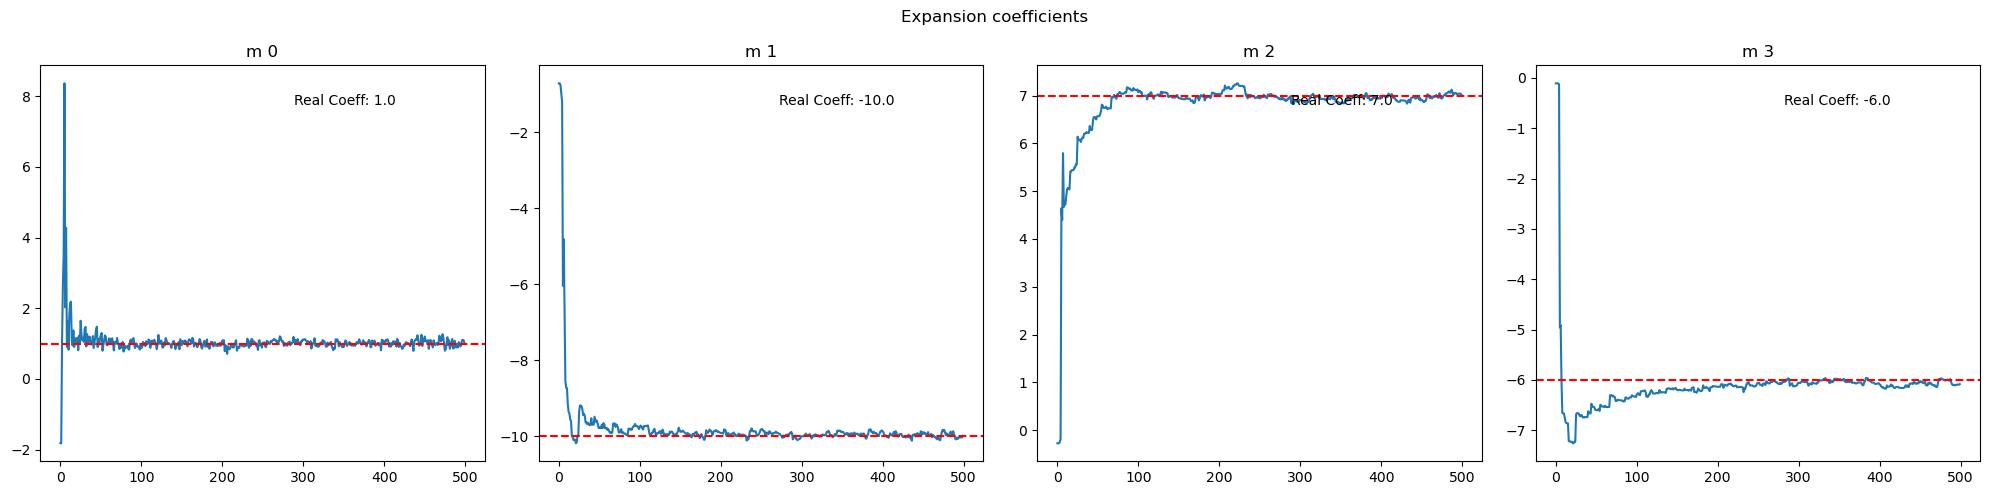

In [14]:
################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 500 # timesteps that generate new datapoints, and are the input for the weights estimates
polynomial_degree = 3

x = np.random.uniform(-1, 1, size=(t,1)) # Generate all x upfront

# Polynomials
P_0 = 1
P_1 = x
P_2 = x**2
P_3 = x**3


real_coeffs = np.array([[1, -10, 7, -6,  -3]])

noise = np.random.normal(scale=0.1, size=(t,1))

y = real_coeffs[0,0] * P_0 + real_coeffs[0,1] * P_1 + real_coeffs[0,2] * P_2 + real_coeffs[0,3] * P_3     + noise



print('x : ', x.shape)
print('y : ', y.shape)



## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz_single_input(x[timestep], y[timestep], polynomial_degree)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz_single_input(x[timestep], y[timestep], polynomial_degree, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:] # All the estimations
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('real_coeffs: ', real_coeffs)
print('coefficients: ', coefficients[:,-1]) # only the last estimation




################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T


""


################################################################################################
####    Plots and graphs
################################################################################################

# # Sort the data by x
sort_indices = np.argsort(x.flatten())
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# Plots
plt.scatter(x, y, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()  # This will add a legend to your plot
plt.show()

#Accuracy plot
r2 = r2_score(y, y_hat)

plt.scatter(y, y_hat)
plt.plot(y,y,color='red', linewidth = 3, label=f'Y=Y_hat, \nR^2  = {r2:.2f}')
plt.legend() 
plt.show()

# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = real_coeffs[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


x :  0.6326503885888115
y :  -4.524666779330341
coefficients shape:  (5, 1000)
coefficients:  [ 1.01 -9.93  6.21 -6.05 -1.91]
real_coeffs:  [[  1 -10   7  -6  -3]]


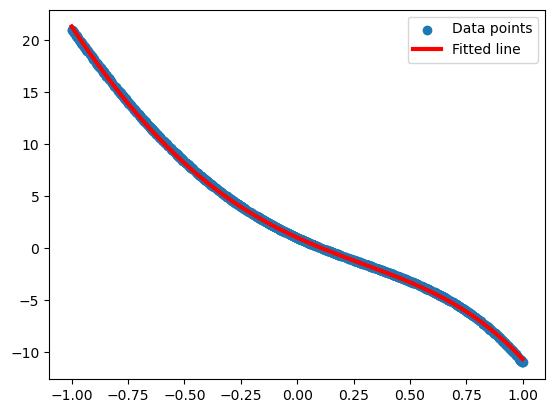

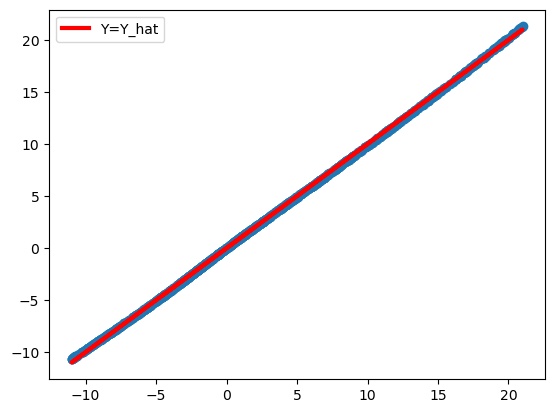

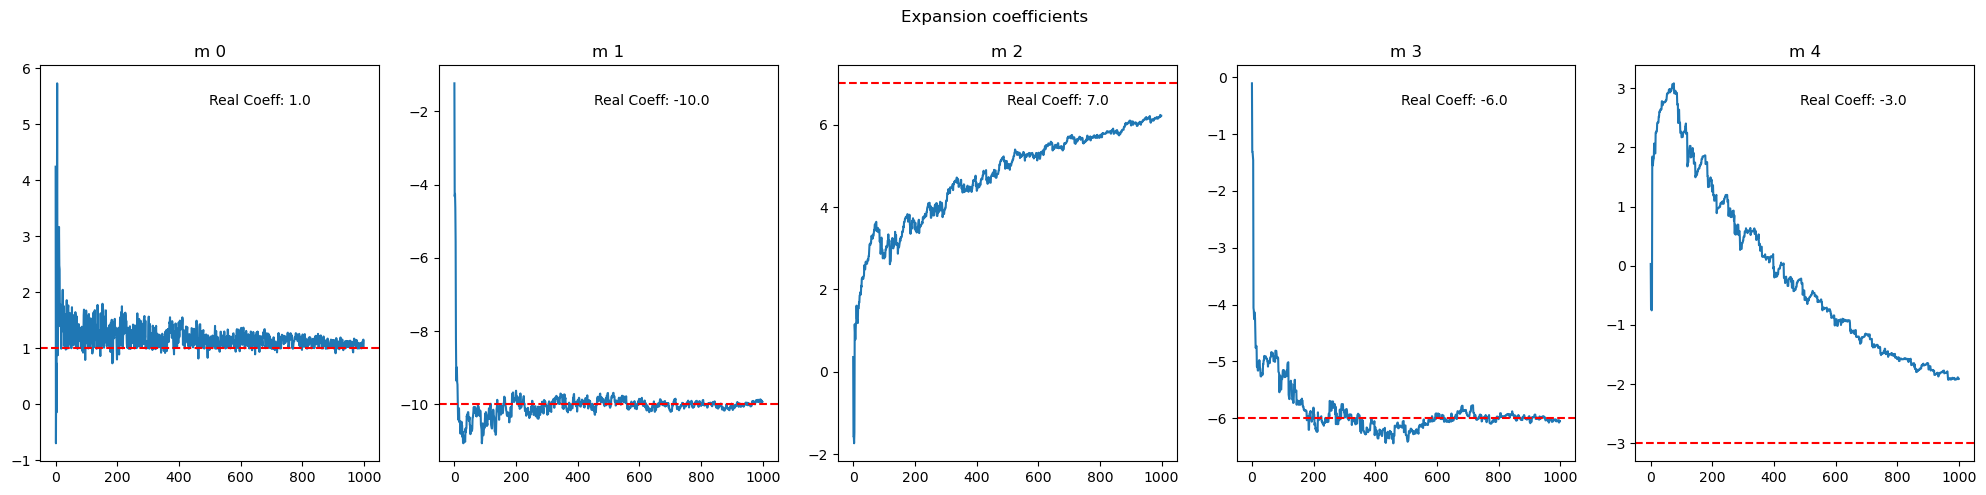

In [13]:
x = random.uniform(-1, 1)
print('x : ', x )

y = (-3 * x**4) + (-6 * x**3) + (7 * x**2) + (-10 * x) + 1 # + np.random.normal(0, 0.1, 1)
print('y : ', y )



real_coeffs = np.array([[1, -10, 7, -6,  -3]])




################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 1000 #timesteps that generate new datapoints, and are the input for the weights estimates
polynomial_degree = 4

## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):
        
    ## This part just generates new additional points with the same function
    new_x = random.uniform(-1, 1)
    x = np.append(x, new_x)

    new_y = (-3 * new_x**4) + (-6 * new_x**3) + (7 * new_x**2) + (-10 * new_x) + 1 # + random.uniform(-0.1, 0.1)
    y = np.append(y, new_y)


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz_single_input(x, y, polynomial_degree)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz_single_input(x, y, polynomial_degree, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:] # All the estimations
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('coefficients: ', coefficients[:,-1]) # only the last estimation
print('real_coeffs: ', real_coeffs)



################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T





################################################################################################
####    Plots and graphs
################################################################################################

# Sort the data by x
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# plt.scatter(x,y)
plt.scatter(x, y, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()  # This will add a legend to your plot
plt.show()

plt.scatter(y, y_hat)
plt.plot(y,y,color='red', linewidth = 3, label='Y=Y_hat')
plt.legend() 

# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = real_coeffs[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
